In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv(r"C:\Users\bduma\OneDrive\Masaüstü\Python\titlebasics.tsv", delimiter='\t', encoding='utf-8', low_memory=False)

In [4]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
df2 = pd.read_csv(r"C:\Users\bduma\OneDrive\Masaüstü\Python\titleratings.tsv", delimiter='\t', encoding='utf-8')

In [6]:
df2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2008
1,tt0000002,5.7,270
2,tt0000003,6.5,1925
3,tt0000004,5.4,178
4,tt0000005,6.2,2698


In [7]:
merged_data = pd.merge(df1, df2, on='tconst')

In [8]:
merged_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2008
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.7,270
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1925
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2698


In [9]:
filtered_data = merged_data[merged_data['titleType'] == 'movie']

In [10]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,486
333,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,860
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21


In [11]:
merged_data['startYear'] = pd.to_numeric(merged_data['startYear'], errors='coerce')

In [12]:
filtered_data = merged_data[(merged_data['titleType'] == 'movie') & (merged_data['startYear'].notna()) & (merged_data['startYear'] >= 1990)]

In [13]:
filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')

C:\Users\bduma\AppData\Local\Temp\ipykernel_11288\1469973035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')


In [14]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3587,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,94,Documentary,6.8,62
4261,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N,5.2,16
4376,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.1,27
12132,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022,\N,87,Musical,4.2,42
17987,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,88181


In [15]:
filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


C:\Users\bduma\AppData\Local\Temp\ipykernel_11288\826935957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


In [16]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3587,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4261,tt0015414,movie,La tierra de los toros,0,2000,\N,5.2,16
4376,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12132,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
17987,tt0035423,movie,Kate & Leopold,0,2001,"Comedy,Fantasy,Romance",6.4,88181


In [17]:
filtered_data = filtered_data[filtered_data['genres'] != '\\N']


In [18]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3587,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4376,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12132,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
17987,tt0035423,movie,Kate & Leopold,0,2001,"Comedy,Fantasy,Romance",6.4,88181
20181,tt0038086,movie,Shiva und die Galgenblume,0,1993,Thriller,7.0,27


In [19]:
print(filtered_data.describe())

           startYear  averageRating      numVotes
count  195458.000000  195458.000000  1.954580e+05
mean     2011.216425       6.231071  4.731686e+03
std         8.646244       1.469195  4.186402e+04
min      1990.000000       1.000000  5.000000e+00
25%      2006.000000       5.300000  2.000000e+01
50%      2013.000000       6.400000  7.300000e+01
75%      2018.000000       7.200000  4.010000e+02
max      2023.000000      10.000000  2.830206e+06


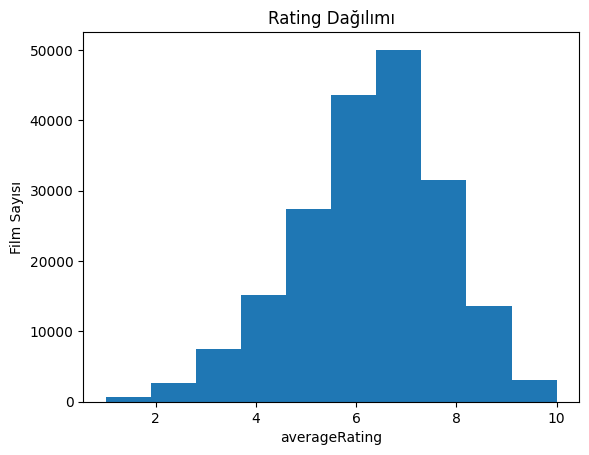

In [20]:
# Rating dağılımını görselleştir
plt.hist(filtered_data['averageRating'])
plt.xlabel('averageRating')
plt.ylabel('Film Sayısı')
plt.title('Rating Dağılımı')
plt.show()


In [21]:
kategori_counts = filtered_data['genres'].value_counts()
print(kategori_counts)

Drama                         32676
Documentary                   29267
Comedy                        14361
Comedy,Drama                   7146
Horror                         6082
                              ...  
History,Mystery                   1
Comedy,Mystery,Sport              1
Documentary,Sport,Thriller        1
Reality-TV,Sci-Fi                 1
Action,Documentary,Mystery        1
Name: genres, Length: 1112, dtype: int64


In [22]:
correlation_matrix = filtered_data.corr()
print(correlation_matrix)

               startYear  averageRating  numVotes
startYear       1.000000       0.062950 -0.033954
averageRating   0.062950       1.000000  0.056068
numVotes       -0.033954       0.056068  1.000000


C:\Users\bduma\AppData\Local\Temp\ipykernel_11288\2274466274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


In [23]:
filtered_data.isnull().sum()

tconst           0
titleType        0
originalTitle    0
isAdult          0
startYear        0
genres           0
averageRating    0
numVotes         0
dtype: int64

In [24]:
filtered_data = pd.get_dummies(filtered_data, columns=['genres'])

In [25]:
# df, değiştirdiğiniz DataFrame'in adı olsun
filtered_data.to_csv('new_data.csv', index=False)